In [4]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

In [15]:
import numpy as np

# counts: 1D array length 256 of integers
counts = np.random.randint(0, 100, size=256)


N = counts.sum()
probs = counts / N



# map integer index -> bitstring like '01001101'
bitstrings = [format(i, '08b') for i in range(256)]

probs = [0.0056, 0.0008, 0.0002, 0.0, 0.013, 0.001, 0.0006, 0.0, 0.0014, 0.0, 0.0, 0.0, 0.0026, 0.0006, 0.0002, 0.0, 0.009, 0.0, 0.0006, 0.0002, 0.0084, 0.001, 0.0006, 0.0, 0.001, 0.0002, 0.0002, 0.0, 0.0012, 0.0002, 0.0008, 0.0, 0.0194, 0.0012, 0.0024, 0.0002, 0.0454, 0.0022, 0.002, 0.0004, 0.0044, 0.0006, 0.0004, 0.0, 0.0156, 0.0028, 0.0026, 0.0002, 0.0094, 0.0002, 0.0004, 0.0, 0.01, 0.0008, 0.0006, 0.0004, 0.0054, 0.0, 0.0004, 0.0002, 0.0106, 0.001, 0.0012, 0.0004, 0.0328, 0.0026, 0.0042, 0.0002, 0.0754, 0.004, 0.0036, 0.001, 0.0038, 0.0, 0.0002, 0.0, 0.0128, 0.001, 0.0014, 0.0006, 0.009, 0.0006, 0.0004, 0.0004, 0.0128, 0.0008, 0.0008, 0.0002, 0.0006, 0.0, 0.0, 0.0, 0.0038, 0.001, 0.0, 0.0, 0.091, 0.0064, 0.0162, 0.0018, 0.2124, 0.0112, 0.0136, 0.0016, 0.0212, 0.0006, 0.0032, 0.0, 0.0834, 0.0074, 0.0082, 0.002, 0.0116, 0.0, 0.001, 0.0, 0.0194, 0.002, 0.0026, 0.0002, 0.0092, 0.0008, 0.0004, 0.0002, 0.0234, 0.0042, 0.0036, 0.0008, 0.0026, 0.0, 0.0002, 0.0, 0.003, 0.0, 0.0006, 0.0, 0.0002, 0.0, 0.0, 0.0, 0.0002, 0.0, 0.0, 0.0, 0.0008, 0.0, 0.0, 0.0, 0.0012, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004, 0.0, 0.0, 0.0, 0.0008, 0.0002, 0.0004, 0.0, 0.0032, 0.0, 0.0004, 0.0, 0.0004, 0.0, 0.0002, 0.0, 0.0012, 0.0002, 0.0004, 0.0, 0.0006, 0.0002, 0.0, 0.0, 0.0006, 0.0002, 0.0, 0.0, 0.0006, 0.0, 0.0002, 0.0, 0.0006, 0.0, 0.0002, 0.0, 0.0038, 0.0, 0.0004, 0.0, 0.0138, 0.0014, 0.001, 0.0, 0.0008, 0.0, 0.0, 0.0, 0.0012, 0.0002, 0.0002, 0.0, 0.0002, 0.0, 0.0002, 0.0, 0.0012, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002, 0.0, 0.0, 0.0, 0.0026, 0.0, 0.0008, 0.0, 0.0066, 0.0012, 0.0008, 0.0, 0.0022, 0.0, 0.0004, 0.0, 0.0064, 0.001, 0.0004, 0.0, 0.0006, 0.0002, 0.0002, 0.0, 0.0012, 0.0002, 0.0004, 0.0, 0.0008, 0.0, 0.0004, 0.0, 0.0034, 0.001, 0.0006, 0.0004]
prob = np.array(probs)

In [16]:
import matplotlib.pyplot as plt

grid = probs.reshape((16,16))  # index 0..255 mapped row-major
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(grid, origin='lower', aspect='equal')
ax.set_title('Heatmap of bitstring probabilities (row=high4bits)')
ax.set_xlabel('low 4 bits')
ax.set_ylabel('high 4 bits')
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Probability')
plt.show()


AttributeError: 'list' object has no attribute 'reshape'

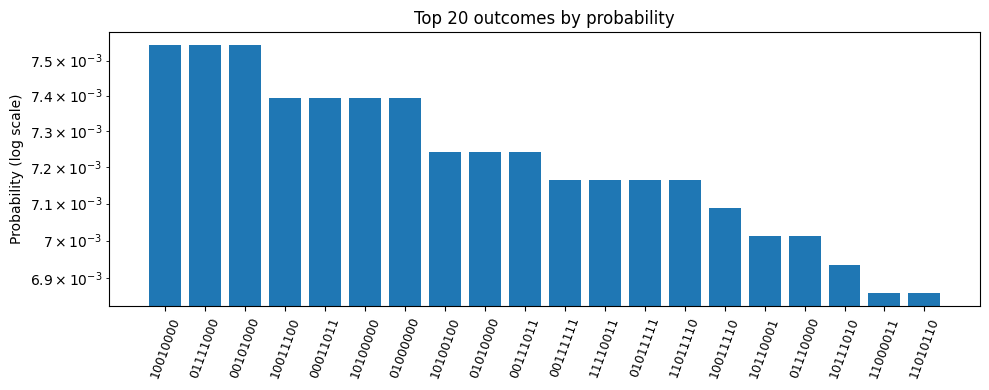

In [7]:
k = 20
idx_sorted = np.argsort(probs)[::-1]
top_idx = idx_sorted[:k]
top_probs = probs[top_idx]
top_labels = [bitstrings[i] for i in top_idx]

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(range(k), top_probs)
ax.set_xticks(range(k))
ax.set_xticklabels(top_labels, rotation=70, fontsize=9)
ax.set_yscale('log')  # optional: show log scale for rare events
ax.set_ylabel('Probability (log scale)')
ax.set_title(f'Top {k} outcomes by probability')
plt.tight_layout()
plt.show()


In [3]:
from math import sqrt
# compute marginals P(qubit_i = 1)
marginals = np.zeros(8)
for i in range(8):
    mask = np.array([((j >> i) & 1) for j in range(256)])  # i-th bit (LSB is qubit 0)
    marginals[i] = (counts * mask).sum() / N

# approximate 95% CI using normal approx (better: Wilson interval for small N)
z = 1.96
cis = z * np.sqrt(marginals * (1 - marginals) / N)

fig, ax = plt.subplots(figsize=(6,3))
qubits = list(range(8))
ax.errorbar(qubits, marginals, yerr=cis, fmt='o', capsize=4)
ax.set_xticks(qubits)
ax.set_xlabel('Qubit index (LSB=0)')
ax.set_ylabel('P=1')
ax.set_title('Single-qubit marginals (with 95% CI)')
ax.set_ylim(-0.02, 1.02)
plt.show()


TypeError: unsupported operand type(s) for *: 'ellipsis' and 'int'

In [ ]:
n1 = qt.tensor(qt.num(num_levels), qt.qeye(num_levels))
n2 = qt.tensor(qt.qeye(num_levels), qt.num(num_levels))

correlator = n1 * n2

measurement = np.zeros((2, len(states)))
correlation = np.zeros(len(states))
covariance = np.zeros(len(states))

measurement[0, :] = [qt.expect(n1, state) for state in states]
measurement[1, :] = [qt.expect(n2, state) for state in states]
correlator_value = [qt.expect(correlator, state) for state in states]
covariance = correlator_value - measurement[0, :]*measurement[1, :]

In [ ]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=top_labels, y=top_probs, text=[int(counts[i]) for i in top_idx],
                        hovertemplate='bitstring: %{x}<br>prob: %{y:.4f}<br>counts: %{text}<extra></extra>')])
fig.update_layout(title=f'Top {k} bitstrings (interactive)', xaxis_tickangle=-45)
fig.show()
